In [156]:
import pandas
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import pydotplus 
from IPython.display import Image
from sklearn import metrics
import graphviz 
from sklearn.metrics import confusion_matrix
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [85]:
#get data from file and create data set
df=pandas.read_csv("column_3C.dat",sep=' ',header=0)
df.columns=['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','class']
df=df.sample(frac=1)

In [80]:
#partition data set into trainingSet,testSet where 4:6
testSet,trainingSet=np.split(df,[int(.6*len(df.index))])

In [81]:
#handle data's features and class
feature_cols = ['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis']
X = testSet[feature_cols] # Features
y = testSet['class']#class
Xp=trainingSet[feature_cols]# preFeatures
yp=trainingSet['class']# preClass

In [82]:
testComponent=[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
accuracys=[]
#measure classification performance change due to numbers of component trees
for numOfComponent in testComponent:
    accuracy=0
    for times in range(3):
        clf = RandomForestClassifier(criterion='entropy',n_jobs= -1 ,n_estimators = numOfComponent)
        clf = clf.fit(X,y)
        prediction = clf.predict(Xp)
        print("in testComponent=", numOfComponent )
        print(metrics.classification_report(yp,prediction))
        accuracy += metrics.accuracy_score(yp,prediction)
    print("AVG accuracy=",accuracy/3)
    accuracys.append(accuracy/3)

in testComponent= 1
              precision    recall  f1-score   support

          DH       0.68      0.49      0.57        39
          NO       0.54      0.59      0.57        54
          SL       0.83      0.88      0.85        93

    accuracy                           0.72       186
   macro avg       0.68      0.65      0.66       186
weighted avg       0.71      0.72      0.71       186

in testComponent= 1
              precision    recall  f1-score   support

          DH       0.68      0.49      0.57        39
          NO       0.62      0.72      0.67        54
          SL       0.92      0.94      0.93        93

    accuracy                           0.78       186
   macro avg       0.74      0.71      0.72       186
weighted avg       0.78      0.78      0.78       186

in testComponent= 1
              precision    recall  f1-score   support

          DH       0.52      0.59      0.55        39
          NO       0.40      0.46      0.43        54
          SL   

in testComponent= 64
              precision    recall  f1-score   support

          DH       0.72      0.46      0.56        39
          NO       0.66      0.70      0.68        54
          SL       0.90      1.00      0.95        93

    accuracy                           0.80       186
   macro avg       0.76      0.72      0.73       186
weighted avg       0.79      0.80      0.79       186

AVG accuracy= 0.7867383512544803
in testComponent= 128
              precision    recall  f1-score   support

          DH       0.67      0.41      0.51        39
          NO       0.62      0.67      0.64        54
          SL       0.89      1.00      0.94        93

    accuracy                           0.78       186
   macro avg       0.73      0.69      0.70       186
weighted avg       0.77      0.78      0.77       186

in testComponent= 128
              precision    recall  f1-score   support

          DH       0.59      0.33      0.43        39
          NO       0.60      0.

Text(0, 0.5, 'accuracy')

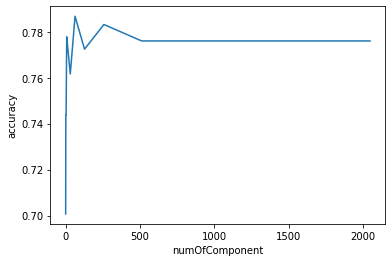

In [83]:
plt.plot(testComponent,accuracys)
plt.xlabel('numOfComponent')
plt.ylabel('accuracy')

In [84]:
print(accuracys)

[0.7007168458781362, 0.7437275985663083, 0.7437275985663083, 0.7777777777777777, 0.7724014336917563, 0.7616487455197133, 0.7867383512544803, 0.7724014336917563, 0.7831541218637993, 0.7759856630824373, 0.7759856630824373, 0.7759856630824373]


In [183]:
# classification performance of component tree of forest 
clf = RandomForestClassifier(criterion='entropy',n_jobs= -1 ,n_estimators = 64)
clf = clf.fit(X,y)
y_pred = clf.predict(Xp)

In [293]:
#i=28#SL
#i=0#DH
i=58#NO
dot_data = tree.export_graphviz(clf.estimators_[i], out_file=None, 
                      feature_names=feature_cols,  
                      class_names=clf.classes_,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render()

'Source.gv.pdf'

In [294]:
clf.estimators_[i].classes_=clf.classes_
ypd=clf.estimators_[i].predict(Xp)
print(metrics.classification_report(yp,ypd))
print(confusion_matrix(yp,ypd))

              precision    recall  f1-score   support

          DH       0.65      0.38      0.48        39
          NO       0.63      0.80      0.70        54
          SL       0.96      0.98      0.97        93

    accuracy                           0.80       186
   macro avg       0.75      0.72      0.72       186
weighted avg       0.80      0.80      0.79       186

[[15 23  1]
 [ 8 43  3]
 [ 0  2 91]]


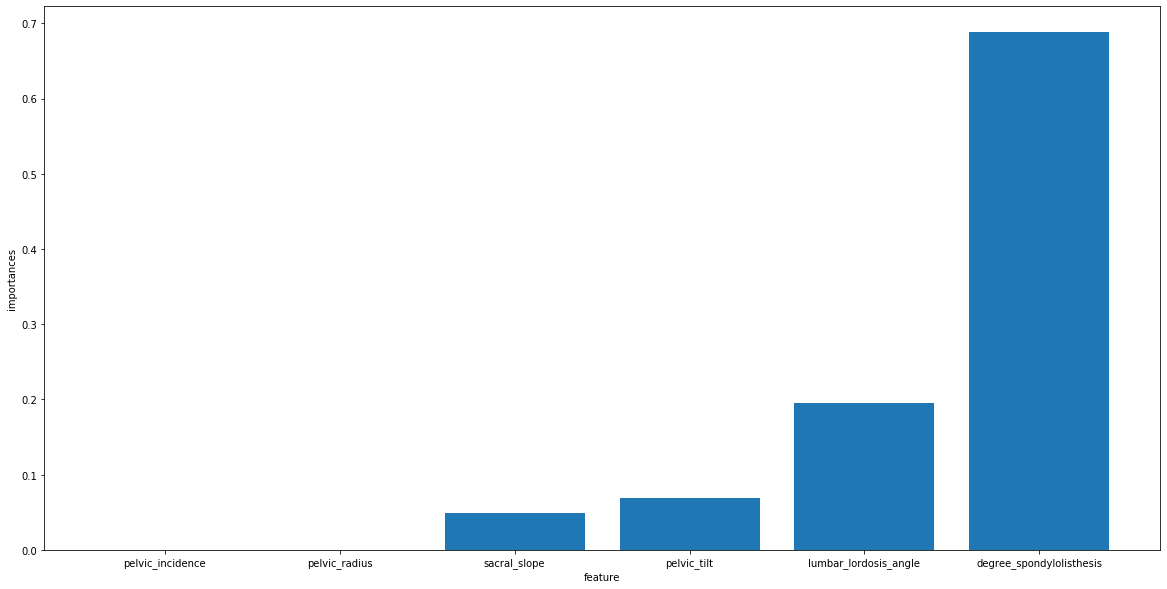

In [295]:
ary=clf.estimators_[i].feature_importances_
dfs=pandas.DataFrame({"feature":feature_cols,"importances":ary})

plt.figure(figsize=(20,10))
# make bar plot with matplotlib
plt.bar('feature', 'importances',data=dfs.sort_values('importances'))
plt.xlabel("feature")
plt.ylabel("importances")
plt.savefig("bar_plot_matplotlib_Python.png")

In [299]:
nb = GaussianNB()
nb = nb.fit(X,y)

In [301]:
nbPredition=nb.predict(Xp)
print(metrics.classification_report(yp,nbPredition))
print(confusion_matrix(yp,nbPredition))
metrics.accuracy_score(yp,nbPredition)

              precision    recall  f1-score   support

          DH       0.69      0.56      0.62        39
          NO       0.67      0.65      0.66        54
          SL       0.88      0.97      0.92        93

    accuracy                           0.79       186
   macro avg       0.75      0.73      0.73       186
weighted avg       0.78      0.79      0.78       186

[[22 14  3]
 [10 35  9]
 [ 0  3 90]]


0.7903225806451613